<a href="https://colab.research.google.com/github/21Ovi/TensorFlow_/blob/main/03_computer_vison_with_tensorflow_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithm which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data

The images we're working with are from the Food101 dataset (101 different classes of food):https://www.kaggle.com/datasets/dansbecker/food-101

However we've modified it to only use 2 classes (pizza🍕 & steak🥩) using the image data modification notebook

> **Note:** We start with with a smaller dataset so we can experiment quickly and figure what works(or better yet what does'nt work)

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-01-12 01:35:54--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  23.2MB/s    in 5.5s    

2023-01-12 01:36:01 (18.9 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crutual step at the beginning og any machine learning project project is becomming one with the datqa

And for computer vision project... this usually means visualizing many samples of your data

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [5]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} names in '{dirpath}'.")

There are 2 directories and 0 names in 'pizza_steak'.
There are 2 directories and 0 names in 'pizza_steak/test'.
There are 0 directories and 250 names in 'pizza_steak/test/steak'.
There are 0 directories and 250 names in 'pizza_steak/test/pizza'.
There are 2 directories and 0 names in 'pizza_steak/train'.
There are 0 directories and 750 names in 'pizza_steak/train/steak'.
There are 0 directories and 750 names in 'pizza_steak/train/pizza'.


In [6]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Jan 12 01:36 .
drwxr-xr-x 1 root root 4096 Jan 12 01:36 ..
drwxr-xr-x 4 root root 4096 Jan 12 01:36 test
drwxr-xr-x 4 root root 4096 Jan 12 01:36 train


In [7]:
# Another way to find out how many images are there in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualize our images, let's first get the class names programmatically

In [8]:
# get the classnames progammatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [9]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory ("we'll view images from here")
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape : {img.shape}") # Show the shape of the image

  return img

['1247645.jpg']
Image shape : (512, 341, 3)


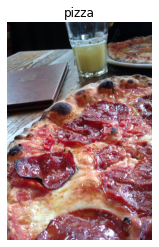

In [10]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [11]:
# The images we've imported and plotted are actually gaint arrays/tensors of different pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 341, 3), dtype=uint8, numpy=
array([[[  4,   6,   5],
        [  5,   7,   6],
        [  5,   7,   6],
        ...,
        [  4,   9,  12],
        [  5,  10,  14],
        [  3,  10,  18]],

       [[  4,   2,   3],
        [  5,   3,   4],
        [  5,   5,   5],
        ...,
        [  5,  10,  14],
        [  5,  10,  13],
        [  6,  12,  12]],

       [[ 10,   0,   1],
        [ 10,   1,   2],
        [  8,   4,   5],
        ...,
        [  4,   9,  15],
        [  5,  10,  13],
        [  5,  11,   7]],

       ...,

       [[150,  93,  76],
        [155,  85,  73],
        [151,  83,  72],
        ...,
        [ 69,  13,  22],
        [ 70,  15,  21],
        [ 71,  16,  22]],

       [[149,  91,  71],
        [153,  83,  71],
        [151,  81,  71],
        ...,
        [ 69,  13,  24],
        [ 71,  15,  26],
        [ 70,  17,  27]],

       [[147,  89,  67],
        [155,  83,  69],
        [153,  83,  75],
        ...,
        [ 71,  15,  2

In [12]:
# View the image shape
img.shape # returns width, height, colour channels

(512, 341, 3)

🔑**Note:** As we've disscussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to scale (also referred to as normalized) their pixel values by dividing the image arrays by 255. (since 255 is the maximum pixel valye)>

In [13]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.01568627, 0.02352941, 0.01960784],
        [0.01960784, 0.02745098, 0.02352941],
        [0.01960784, 0.02745098, 0.02352941],
        ...,
        [0.01568627, 0.03529412, 0.04705882],
        [0.01960784, 0.03921569, 0.05490196],
        [0.01176471, 0.03921569, 0.07058824]],

       [[0.01568627, 0.00784314, 0.01176471],
        [0.01960784, 0.01176471, 0.01568627],
        [0.01960784, 0.01960784, 0.01960784],
        ...,
        [0.01960784, 0.03921569, 0.05490196],
        [0.01960784, 0.03921569, 0.05098039],
        [0.02352941, 0.04705882, 0.04705882]],

       [[0.03921569, 0.        , 0.00392157],
        [0.03921569, 0.00392157, 0.00784314],
        [0.03137255, 0.01568627, 0.01960784],
        ...,
        [0.01568627, 0.03529412, 0.05882353],
        [0.01960784, 0.03921569, 0.05098039],
        [0.01960784, 0.04313725, 0.02745098]],

       ...,

       [[0.58823529, 0.36470588, 0.29803922],
        [0.60784314, 0.33333333, 0.28627451],
        [0.59215686, 0

## An end-to-end example

Let's build a Convolutional Neural Network to find patterns in our images, more specifically we need a way to:
* Load our images
*preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224,3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 23s 265ms/step - loss: 0.5410 - accuracy: 0.7373 - val_loss: 0.3871 - val_accuracy: 0.8360
Epoch 2/5
47/47 [==============================] - 9s 192ms/step - loss: 0.4252 - accuracy: 0.8060 - val_loss: 0.3653 - val_accuracy: 0.8540
Epoch 3/5
47/47 [==============================] - 9s 191ms/step - loss: 0.3836 - accuracy: 0.8307 - val_loss: 0.3264 - val_accuracy: 0.8780
Epoch 4/5
47/47 [==============================] - 9s 191ms/step - loss: 0.3539 - accuracy: 0.8560 - val_loss: 0.2894 - val_accuracy: 0.8820
Epoch 5/5
47/47 [==============================] - 10s 209ms/step - loss: 0.3122 - accuracy: 0.8713 - val_loss: 0.2938 - val_accuracy: 0.8880


> 🔑**Note**: If the cell above takes more than ~12 seconds per epoch to run, you might not be using a GPU accelerator. If you're using a Colab notebook, you can access a GPU accelerator by going to Runtime -> Change Runtime Type -> Hardware Accelerator and select "GPU". After doing so, you might have to rerun all of the above cells as changing the runtime type causes Colab to have to reset.



In [15]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

🛠 Practice: Step through each of the main blocks of code in the cell above, what do you think each is doing? It's okay if you're not sure, we'll go through this soon. In the meantime, spend 10-minutes playing around the incredible [CNN explainer website](https://poloclub.github.io/cnn-explainer/). What do you notice about the layer names at the top of the webpage?

## Using the same model as before

KLet's replicate the model we've built in a previous section to see if it works with our image data

The model we're building is from the [TensorFlow Playground](http://playground.tensorflow.org/)

In [16]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFloe Playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 184ms/step - loss: 0.8124 - accuracy: 0.4993 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 178ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 178ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 179ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 176ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [17]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x parameters than our CNN (model_1), model_2 performs teribly... let's try

In [18]:
#  Set random seed
tf.random.set_seed(42)

# Create the model (same as above but let's step it up a notch)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 200ms/step - loss: 2.6610 - accuracy: 0.6327 - val_loss: 0.4930 - val_accuracy: 0.7640
Epoch 2/5
47/47 [==============================] - 9s 193ms/step - loss: 0.8636 - accuracy: 0.6907 - val_loss: 0.7170 - val_accuracy: 0.7340
Epoch 3/5
47/47 [==============================] - 8s 181ms/step - loss: 1.1757 - accuracy: 0.6920 - val_loss: 0.5712 - val_accuracy: 0.6840
Epoch 4/5
47/47 [==============================] - 8s 179ms/step - loss: 0.5611 - accuracy: 0.7613 - val_loss: 0.4629 - val_accuracy: 0.7860
Epoch 5/5
47/47 [==============================] - 8s 180ms/step - loss: 0.5334 - accuracy: 0.7687 - val_loss: 0.4777 - val_accuracy: 0.7700


In [19]:
# Gte a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


🔑**Note:** You can think of trainable parameters as `patterns a model can learn from data`.Intuitively, you might think more is better. And in lots of cases, it is. But in this case, the difference here is the two different styles of model we're using. Where a possible series of dense layers has a number of different learnable patterns, `a convolutional neurl network seeks to sort out and learn the most important patterns in an image`. So even though these are less learnable parameters in our convolutional neural network, these are often more helpful in deciphering between different `features` in an image.

In [20]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Binary Classification: let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main steps here was scaling/normalizing & turn our data into batch size)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

['1021458.jpg']
Image shape : (512, 512, 3)
['3427699.jpg']
Image shape : (512, 512, 3)


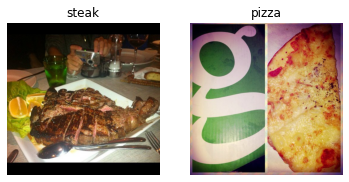

In [21]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepared it for our model)

In [22]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
testdir = "pizza_steak/test/"

Our next step is to turn our data into `batches`.

A Batch is a small subset of data. Rather than look at all ~10,000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your processir (GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

why 32?

Because 32 is good for your health...

In [23]:
# Create train and test data genetrators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [24]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directory of images
                                              target_size=(224, 224), # Target size of images (height, width)
                                              class_mode="binary", # type of data you're working with
                                              batch_size=32) # size of minibatches to load data into

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [25]:
# Get a sample of a training data batcg
images, labels = train_data.next() # Get tge "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [26]:
# How many batches are there ?
len(train_data)

47

In [27]:
1500/32

46.875

In [28]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [29]:
images[7].shape

(224, 224, 3)

In [30]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a model (start with a baseline)

A baseline is a relatively simple moddel or existing result that you setup when u keep beginning a machine learning experiment and then you experimenting, you try to beat the baseline.


🔑**Note:** In deep learning, there is almost an infinite amount of architecture you could create. So one of the best ways yo get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem).

In [31]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [32]:
# Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10, # Filter is the number of sliding windows going across an input (higer = more complex model)
           kernel_size=3, # The size of the sliding window going across an input
           strides=1, # the size of the step the sliding window takes accross the windows
           padding="valid", # If "same", output shape is same as input shape,if "valid", output shape gets compressed
           activation="relu",
           input_shape=(224, 224, 3)), # Inpu layer (specify input shape)
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # Output layer (working with binary classification so only 1 output neuron)
])

In [33]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [34]:
# Get the summary of the model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [35]:
# Check the lenghs of training and test data generator
len(train_data), len(test_data)

(47, 16)

In [36]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 219ms/step - loss: 1.4467 - accuracy: 0.6533 - val_loss: 0.4617 - val_accuracy: 0.7980
Epoch 2/5
47/47 [==============================] - 9s 196ms/step - loss: 0.4462 - accuracy: 0.8093 - val_loss: 0.4073 - val_accuracy: 0.8060
Epoch 3/5
47/47 [==============================] - 10s 203ms/step - loss: 0.3499 - accuracy: 0.8600 - val_loss: 0.3691 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 9s 193ms/step - loss: 0.2181 - accuracy: 0.9300 - val_loss: 0.4801 - val_accuracy: 0.7940
Epoch 5/5
47/47 [==============================] - 9s 194ms/step - loss: 0.1098 - accuracy: 0.9667 - val_loss: 0.4280 - val_accuracy: 0.8140


In [37]:
model_1.evaluate(test_data)

16/16 [==============================] - 3s 178ms/step - loss: 0.2938 - accuracy: 0.8880


[0.29382339119911194, 0.8880000114440918]

In [38]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [39]:
model_4.evaluate(test_data)

16/16 [==============================] - 2s 135ms/step - loss: 0.4280 - accuracy: 0.8140


[0.4280450940132141, 0.8140000104904175]

### 5. Evaluate our model

It looks like our model is learning something, let's evaluate it

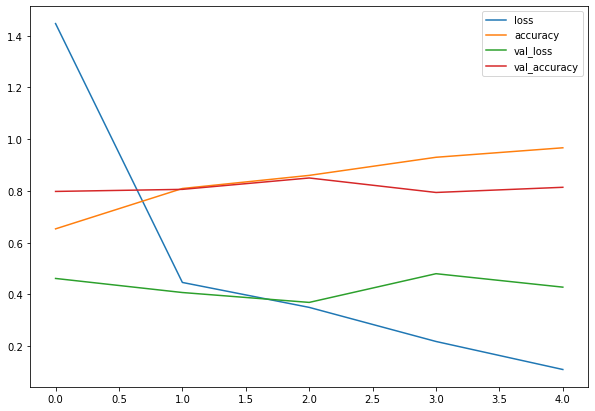

In [41]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [43]:
# Plt the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metriics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # How many eopochs we run for?

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

🔑**Note:** When a model's `validation loss starts to increase`, it's likely that the model is `overfitting` the training dataset. This means, it's learning the pattern in the training the dataset too well and thus the model's ability to generalize to unseen data will be diminished. 

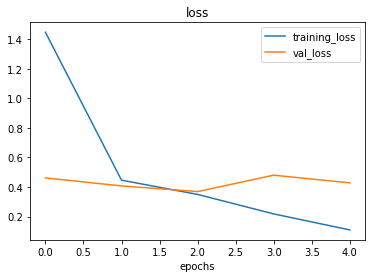

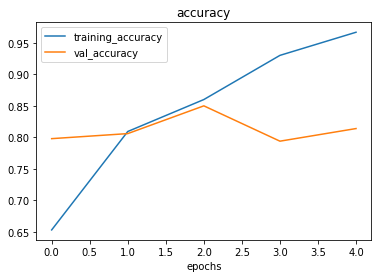

In [44]:
# Check out the loss and accuacy of model_4
plot_loss_curves(history_4)

🔑**Note:**Ideally the loss curves (training and validation) will be very similar to each other (training loss and validation loss decreaseing at similat rates), when there are large difference your model may be `overfitting`.

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps : 
0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to include overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting :
* Add data agumentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

In [45]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(223, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [46]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [48]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 193ms/step - loss: 0.6572 - accuracy: 0.6213 - val_loss: 0.5020 - val_accuracy: 0.7800
Epoch 2/5
47/47 [==============================] - 9s 184ms/step - loss: 0.4801 - accuracy: 0.7813 - val_loss: 0.3913 - val_accuracy: 0.8160
Epoch 3/5
47/47 [==============================] - 9s 186ms/step - loss: 0.4321 - accuracy: 0.8053 - val_loss: 0.3550 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 9s 184ms/step - loss: 0.3912 - accuracy: 0.8267 - val_loss: 0.3861 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 13s 269ms/step - loss: 0.3822 - accuracy: 0.8333 - val_loss: 0.3322 - val_accuracy: 0.8600


In [49]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 221, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 108, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      